<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_6/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Logistic Regression: The simplest Neural Network (NN)

We start with a simple Logistic regression. 

We can use computation graphs for representation which would look like:

![Simple Logistic Regression](https://www.dropbox.com/s/5ql7mpu9uwim8xk/computationGraph_LR.png?dl=1 )

For our purposses, it is more convenient to seperate the parameters

![alt text](https://www.dropbox.com/s/pxrmeyz3uwwb95i/computationGraph_LR_2.png?dl=1)

We can simplify this a bit to get

![alt text](https://www.dropbox.com/s/8hspbepvubgu1ia/computationGraph_LR_simplified.png?dl=1)





In [0]:
'''
Ideally, we should train the estimator and find the
w and b that minimizes the loss. However, the following
function makes no assumption about the w and b. 
The inputs are numpy arrays and their shapes are
x: (1, n_f)
w: (1, n_f)  
b: (1  , 1) 
'''
def log_reg_predict(x, w, b ):
    return sigmoid( np.dot(x, w.T) + b )

In [6]:
x = np.random.uniform(-1,1,size=[1,2])
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])
predicted_y = log_reg_predict(x,w,b)
predicted_y

array([[0.18551557]])

In [7]:
### This would work with a list of samples.
n_s = 100  # number of samples

x = np.random.uniform(-1,1,size=[n_s,2])
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])
predicted_y = log_reg_predict(x,w,b)
predicted_y.shape


(100, 1)

## Multi Class 
Consider the same problem, but with three classes instead of two. Now the computation graph would be like
![alt text](https://www.dropbox.com/s/jryr9f7udnxuetq/computationGraph_LR_simplified_multi_class.png?dl=1)
which means that there are three output nodes, one for the probability of each class. How would this work?

As we discussed in the first part of the course, we need to train three distinct estimators, one for each class. 

{ w<sub>1</sub>, b<sub>1</sub> } => Class 1

{ w<sub>2</sub>, b<sub>2</sub> } => Class 2

{ w<sub>3</sub>, b<sub>3</sub> } => Class 3

Just like before, each w<sub>i</sub> is a vector and each b<sub>i</sub> is a number. 

We can stack them together and make the matrix W with shape of (3,  n<sub>f</sub>) and 
 the matrix B with shape of (3, 1). The rest would be the same. In fact our implementation of the logistic regression would not require any modification.  

In [9]:
n_s = 100  # number of samples
n_outputs = 3
n_f= 2

x = np.random.uniform(-1,1,size=[n_s,n_f])
w = np.random.uniform(-1,1,size=[n_outputs,n_f])
b = np.random.uniform(-1,1,size=[1, n_outputs])
predicted_y = log_reg_predict(x,w,b)
predicted_y.shape


(100, 3)

## Multi Layer

Now consider the situation where two logistic regressions are compined to make a new estimator. 

That is, LR1 is applied to that innput features  and determine the probabilities of different classes. Then LR2 takes these probabilities as an input and based on that determine the probabilities of  a second classification problem. 
The computation graph would look like

![alt text](https://www.dropbox.com/s/9o01doidvs6hmj9/computationGraph_LR_simplified_multi_layer.png?dl=1)  
  
For charachterization of this estimator, we need two sets of W and B matrices, one for the LR1 and one for LR2. We use the following notation for that:

W<sup>[1]</sup> => Weights for LR1

B<sup>[1]</sup> => Biases for LR1

W<sup>[2]</sup> => Weights for LR1

W<sup>[2]</sup> => Biases for LR1

As discussed before, W<sup>[1]</sup> is 

{ w<sup>[1]</sup><sub>1</sub>, b<sub>1</sub> } => Class 1

{ w<sup>[1]</sup><sub>2</sub>, b<sub>2</sub> } => Class 2

{ w<sup>[1]</sup><sub>3</sub>, b<sub>3</sub> } => Class 3

So, each w<sup>[j]</sup><sub>i</sub> is a vector and each b<sup>[j]</sup><sub>i</sub> is a number and they correspond to classification of class i for LR_j. 

Use what we haev done so far to implement this! 

(Optional) Design your function such that it work for n_s samples. 

In [0]:
def NN_forward(X, w_list, b_list):
  a = []
  a += [X]
  for i in range(len(w_list)):
    a += [log_reg_predict(a[-1], w_list[i], b_list[i])]
  
  return a


    

In [18]:
n_s = 100  # number of samples
n_outputs = 3
n_f = 2
n_l = [n_f, 5, 6, n_outputs ]

x = np.random.uniform(-1,1,size=[n_s,n_f])
w_list = [ np.random.uniform(-1,1,size=[ n_l[i+1] , n_l[i] ] ) for i in range(len(n_l) - 1 )  ]
b_list = [ np.random.uniform(-1,1,size=[1, n_l[i+1]  ]) for i in range(len(n_l) - 1 )  ]

# [print(w.shape) for w in w_list]
# [print(w.shape) for w in b_list]

# predicted_y = log_reg_predict(x,w,b)
# predicted_y.shape
a = NN_forward(x, w_list, b_list)
a[-1].shape


(100, 3)

# Training a logistic regression

## Loss

In [0]:
'''
We need to define our loss function for training. 
We use the cross-entropy. 
'''

def cross_entropy(y, a):
    return -y*np.log(a)- (1-y)*np.log(1-a)


def cross_entropy_loss(y_list, x_list, w, bias=0):
                  
    ''' 
    First, you need to calculate the a = sig(z).
    Then calculate the loss using the equation for cross entropy. 
    
    '''
    n_sample = len(y_list)
    y_list = y_list.reshape(n_sample,1)
    
    z_list = ( np.dot(x_list, w.T ) + bias ).reshape( -1  , 1 )
    a_list = sigmoid( z_list )
    
    loss = cross_entropy(y_list, a_list).sum() / n_sample
    return loss



In [0]:
n_s=1000
x = np.random.uniform(-1,1,size=[n_s,2])
w_list = np.random.uniform(-20,20,size=[100, 1, 2])
ce_loss_list = [ cross_entropy_loss( predicted_y, x, w, b)  for w in w_list]

w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])

predicted_y = log_reg_predict(x,w,b)
print(w_list.shape)


(100, 1, 2)


In [0]:
w_list[:,:,0].reshape(-1).shape

(100,)

The true parameters are 
 w=[[ 0.7613062  -0.58300925]] which is in dicated by the red point.


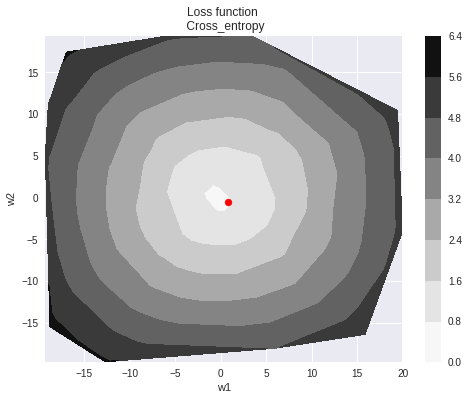

In [0]:
# ce_loss_list = [ cross_entropy_loss( predicted_y, x, w, b)  for w in w_list]


print('The true parameters are \n w={} which is in dicated by the red point.'.format(w.reshape(1,-1)))

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111,title = 'Loss function \n Cross_entropy', xlabel='w1', ylabel='w2')


p1 = ax1.tricontourf(w_list[:,:,0].reshape(-1),w_list[:,:,1].reshape(-1), ce_loss_list)
ax1.scatter(w[0,0], w[0,1], color='r')
plt.colorbar(p1, ax=ax1)



plt.show()

## Using an optimizer

In [0]:
from scipy.optimize import minimize
print('The true parameters are \n w = {}, \n and b = {}. '.format(w.reshape(1,-1)[0] , b[0,0]))

The true parameters are 
 w = [ 0.7613062  -0.58300925], 
 and b = -0.025999105893764973. 


In [0]:
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])
np.array([ [w[0,0],w[0,1]] ]).shape

(1, 2)

In [0]:
min_w = minimize( (lambda w: cross_entropy_loss(predicted_y, x, np.array([ [w[0],w[1]] ]),w[2] )),[0,0, 0])
print('The optimized values are: w1, w2, b = {}'.format(min_w.x))

The optimized values are: w1, w2, b = [ 0.76129796 -0.58296354 -0.0260065 ]


# Step-by-Step GD for Logistic Regression

Now we want to do this ourselves, not using the optimizer. 

We will use a simple GD algorithm which basically does the following:

w_1  -> w_1 - alpha * dL/dw_1

w_2  -> w_2 - alpha * dL/dw_2